## Background

In this notebook I'll calculate the Flesch-Kincaid reading grade level for the `financial_phrasebank` dataset. [Previously](https://vishalbakshi.github.io/blog/posts/2024-08-02-tinystories-readinglevel/), I found the TinyStories dataset had a median grade level of 2.7. I expect `financial_phrasebank` to have a higher grade level due to financial jargon. If true, this suggests fine-tuning TinyInstruct-33M on `financial_phrasebank` may be less effective than using a simplified version (which I'll create with phi-3 as a future exercise) as I endeavor to build a "TinySentiment" classifier.

## Setup

In [ ]:
!pip install textstat -qq
!pip install datasets -qq

In [ ]:
from datasets import load_dataset
import numpy as np
import textstat

ds = load_dataset(
    "financial_phrasebank", "sentences_allagree",
    split="train"  # note that the dataset does not have a default test split
)

In [3]:
ds

Dataset({
    features: ['sentence', 'label'],
    num_rows: 2264
})

In [4]:
ddf = ds.to_pandas() # convert to a DataFrame to apply textstat.flesch_kincaid_grade
ddf.shape

(2264, 2)

## Calculating Flesch-Kincaid Reading Grade Level

I can calculate the reading grade level for the 2264 rows in about 0.5 seconds by using `textstat.flesch_kincaid_grade`. See my [previous blog post](https://vishalbakshi.github.io/blog/posts/2024-08-02-tinystories-readinglevel/#deeper-dive-into-textstat) for a deeper dive on how `textstat` calculates reading grade level.

In [5]:
ddf['fk_grade'] = ddf['sentence'].apply(lambda x: textstat.flesch_kincaid_grade(x))

The mean and median reading grade levels for this dataset are 8.6 and 8, respectively, about 6 grade levels higher than the TinyStories dataset.

In [7]:
ddf['fk_grade'].describe()

,fk_grade
count,2264.000000
mean,8.616078
std,4.933004
min,-3.100000
25%,4.600000
50%,8.000000
75%,12.200000
max,24.800000


Here's an example of a Grade 8 reading level `sentence`:

In [10]:
ddf.query("fk_grade == 8").iloc[0]['sentence']

'Both operating profit and turnover for the three-month period increased , respectively from EUR0 .9 m and EUR8 .3 m , as compared to the corresponding period in 2005 .'

The highest grade level in this dataset is 24.1 (well beyond post-graduate) likely due to its long list of multisyllabic industries:

In [11]:
ddf.query("fk_grade == 24.8").iloc[0]['sentence']

'The company serves customers in various industries , including process and resources , industrial machinery , architecture , building , construction , electrical , transportation , electronics , chemical , petrochemical , energy , and information technology , as well as catering and households .'

The lowest reading level is -3.1:

In [12]:
ddf.query("fk_grade == -3.1").iloc[0]['sentence']

'R&D Loan ) .'

The histogram illustrates that a significant portion of the dataset (25%) is above Grade 12. Less than 0.0005% of TinyStories was above Grade 12.

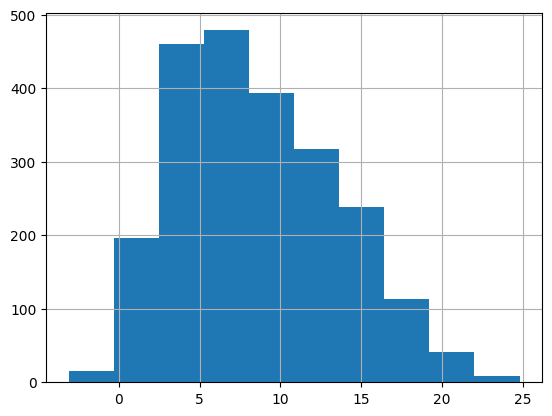

In [16]:
ddf['fk_grade'].hist();

In [19]:
ddf.query("fk_grade > 12")['fk_grade'].count() / 2264

0.2539752650176678

## Final Thoughts

As expected, `financial_phrasebank` (median reading grade level of 8) uses more complex language than TinyStories (median reading grade level of 2.7). This may make it challenging for TinyInstruct-33M to learn from. To test this, I'll:

1. Fine-tune TinyInstruct-33M on `financial_phrasebank`
2. Create a lower reading grade version of the dataset using phi-3
3. Fine-tune TinyInstruct-33M on the simplified dataset
4. Compare performance of both fine-tuned models

I hope you enjoyed this blog post! Follow me on Twitter [@vishal_learner](https://twitter.com/vishal_learner).